<a href="https://colab.research.google.com/github/phyllo311/Mobility-and-Covid-19/blob/main/Finland_Mobility_and_Covid_19.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip -q install boto3
# first run usually get error, refresh Colab page and run installation again, it should be fine

In [ ]:
import boto3
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import plotly.graph_objects as go
import urllib, json
import numpy as np
import statsmodels.api as sm

In [ ]:
pd.set_option('max_rows', 99999)
pd.set_option('max_colwidth', 400)
pd.describe_option('max_colwidth')

In [ ]:
def jsonNorm(url):
  url = url
  response = urllib.request.urlopen(url)
  dat = json.loads(response.read())
  return dat

In [ ]:
#this dataset reports  by confirmed, death, recovered patient separately by ID, need to count obs
#url = "https://w3qa5ydb4l.execute-api.eu-west-1.amazonaws.com/prod/finnishCoronaData/v2
#dat1 = jsonNorm(url)

In [ ]:
#confirmed = pd.DataFrame.from_dict(pd.json_normalize(dat1["confirmed"]))
#confirmed.head()

In [ ]:
#deaths = pd.DataFrame.from_dict(pd.json_normalize(dat["deaths"]))
#display(deaths)

In [ ]:
#deaths["date"] = pd.to_datetime(deaths["date"]).dt.date
#deaths.head()

In [ ]:
#recovered = pd.DataFrame.from_dict(pd.json_normalize(dat["recovered"]))
#display(recovered)

# FINLAND HOSPITALIZED DATA

https://github.com/HS-Datadesk/koronavirus-avoindata#direct-interface-to-hs-data
- Daily hospitalized, inWard, inICU
- Cumsum Deaths

In [ ]:
url = "https://w3qa5ydb4l.execute-api.eu-west-1.amazonaws.com/prod/finnishCoronaHospitalData"
data2 = jsonNorm(url)

In [ ]:
data2.keys()

dict_keys(['hospitalised'])

In [ ]:
df = pd.DataFrame.from_dict(pd.json_normalize(data2, record_path=['hospitalised']))
display(df)

,date,area,totalHospitalised,inWard,inIcu,dead
0,2020-03-21T13:00:00.000Z,HYKS,0,0,0,1
1,2020-03-21T13:00:00.000Z,Finland,0,0,0,1
2,2020-03-25T13:00:00.000Z,HYKS,63,45,18,2
3,2020-03-25T13:00:00.000Z,KYS,6,3,3,0
4,2020-03-25T13:00:00.000Z,OYS,4,3,1,0
...,...,...,...,...,...,...
1278,2021-02-26T12:34:00.000Z,KYS,32,31,1,79
1279,2021-02-26T12:34:00.000Z,OYS,32,29,3,33
1280,2021-02-26T12:34:00.000Z,TAYS,27,24,3,62
1281,2021-02-26T12:34:00.000Z,TYKS,20,15,5,77


In [ ]:
type(df)

pandas.core.frame.DataFrame

In [ ]:
df.dtypes

date                 object
area                 object
totalHospitalised     int64
inWard                int64
inIcu                 int64
dead                  int64
dtype: object

In [ ]:
df["date"] = pd.to_datetime(df["date"]).dt.date

In [ ]:
#check hospital areas
pd.unique(df["area"])

array(['HYKS', 'Finland', 'KYS', 'OYS', 'TAYS', 'TYKS', 'Other than HYKS'],
      dtype=object)

In [ ]:
df.head()

,date,area,totalHospitalised,inWard,inIcu,dead
0,2020-03-21,HYKS,0,0,0,1
1,2020-03-21,Finland,0,0,0,1
2,2020-03-25,HYKS,63,45,18,2
3,2020-03-25,KYS,6,3,3,0
4,2020-03-25,OYS,4,3,1,0


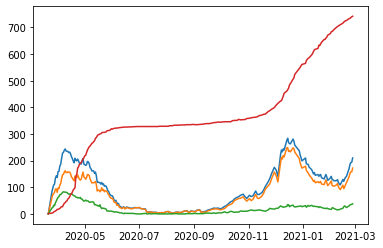

In [ ]:
FI = df[(df.area == "Finland")] # & (df.date != "2020-03-21") & (df.date != "2020-03-26")]
plt.plot(FI["date"], FI["totalHospitalised"], FI["date"], FI["inWard"], FI["date"], FI["inIcu"], FI["date"], FI["dead"])

In [ ]:
#exclude the date 21 and 26 March to make the datetime data correspondent to that of other regions
df['date'] = pd.to_datetime(df['date'])
HYKS = df[(df.area == "HYKS") & (df.date != "2020-03-21") & (df.date != "2020-03-26")]
HYKS

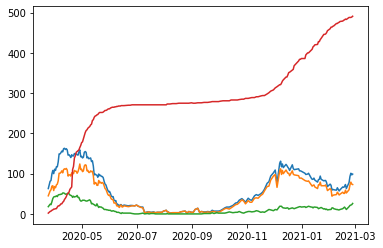

In [ ]:
plt.plot(HYKS["date"],HYKS["totalHospitalised"], HYKS["date"],HYKS["inWard"],HYKS["date"],HYKS["inIcu"],HYKS["date"],HYKS["dead"])

In [ ]:
import plotly.express as px

In [ ]:
dftest = df[(df.date != "2020-03-21") & (df.date != "2020-03-26")]
dftest

,date,area,totalHospitalised,inWard,inIcu,dead
0,2020-03-21,HYKS,0,0,0,1
1,2020-03-21,Finland,0,0,0,1
2,2020-03-25,HYKS,63,45,18,2
3,2020-03-25,KYS,6,3,3,0
4,2020-03-25,OYS,4,3,1,0


In [ ]:
import plotly.express as px
figtest = px.area(dftest[(dftest.area != "Finland")], x = "date", 
                  y = "totalHospitalised", 
                  color = "area",
                  color_discrete_sequence=px.colors.qualitative.Pastel,
                  title = "Daily Total Hospitalized Covid patients")

figtest.show()

In [ ]:
# testing animation plot
fig2 = px.scatter(dftest[(dftest.area != "Finland")], x = "totalHospitalised", 
                  y = "dead", 
                  animation_frame = dftest[(dftest.area != "Finland")]["date"].astype(str), 
                 # animation_group = "area",
                  size = "totalHospitalised", 
                  color = "area", 
                  hover_name = "area", 
                 #facet_col = "area",
                  #log_x = True,
                  #log_y = True,
                  #size_max = 45, 
                  range_x = [0,300], range_y = [-20,500]
                  )
fig2.update_layout(transition_duration=5)
fig2.update_layout(title = "Total Hospitalized vs Deaths by Covid in Finland",
xaxis = dict(title = 'Daily Hospitalized Patients'),
yaxis = dict(title = "Cumulative Deaths"))
fig2.layout.updatemenus[0].buttons[0].args[1]['frame']['duration'] = 300
fig2.show()

In [ ]:
#CHECK MISSING VALUES: NO MISSING VALUES
print(df.isnull().sum())

date                 0
area                 0
totalHospitalised    0
inWard               0
inIcu                0
dead                 0
dtype: int64


In [ ]:
print(df[df['date'] == '2020-06-19'])

Empty DataFrame
Columns: [date, area, totalHospitalised, inWard, inIcu, dead]
Index: []


In [ ]:
# CHECK DATE CONTINUITY:  DF HAS 128 DAYS NOT REPORTED
df['date'] = pd.to_datetime(df['date'])
min(df['date'])
max(df['date'])
date_lst = pd.date_range(start = min(df['date']) , end = max(df['date']))
no_date = date_lst.difference(df['date'])
no_date

DatetimeIndex(['2020-03-22', '2020-03-23', '2020-03-24', '2020-06-18',
               '2020-06-19', '2020-06-20', '2020-06-21', '2020-06-23',
               '2020-06-25', '2020-06-27',
               ...
               '2021-01-23', '2021-01-24', '2021-01-30', '2021-01-31',
               '2021-02-06', '2021-02-07', '2021-02-13', '2021-02-14',
               '2021-02-20', '2021-02-21'],
              dtype='datetime64[ns]', length=128, freq=None)

# CONFIRMED PATIENTS (THL DATA)

In [ ]:
# confirmed cases by regions
url = "https://w3qa5ydb4l.execute-api.eu-west-1.amazonaws.com/prod/processedThlData"
dat3 = jsonNorm(url)

In [ ]:
#dat3["confirmed"].items()

In [ ]:
df3 = pd.json_normalize(dat3["confirmed"]["Ahvenanmaa"])
df3

In [ ]:
lst = ('Ahvenanmaa', 'Varsinais-Suomi', 'Satakunta', 'Kanta-Häme',
                                   'Pirkanmaa','Päijät-Häme','Kymenlaakso','Etelä-Karjala','Etelä-Savo',
                                   'Itä-Savo','Pohjois-Karjala','Pohjois-Savo','Keski-Suomi', 'Etelä-Pohjanmaa',
                                   'Vaasa', 'Keski-Pohjanmaa', 'Pohjois-Pohjanmaa', 'Kainuu', 'Länsi-Pohja', 
                                   'Lappi', 'HUS', 'Kaikki sairaanhoitopiirit')

cfm = pd.DataFrame()
for i in lst:
  temp = pd.json_normalize(dat3["confirmed"][i])
  cfm = cfm.append(temp, ignore_index=True)

In [ ]:
cfm["date"] = pd.to_datetime(cfm["date"]).dt.date

In [ ]:
pd.unique(cfm['healthCareDistrict'])

array(['Ahvenanmaa', 'Varsinais-Suomi', 'Satakunta', 'Kanta-Häme',
       'Pirkanmaa', 'Päijät-Häme', 'Kymenlaakso', 'Etelä-Karjala',
       'Etelä-Savo', 'Itä-Savo', 'Pohjois-Karjala', 'Pohjois-Savo',
       'Keski-Suomi', 'Etelä-Pohjanmaa', 'Vaasa', 'Keski-Pohjanmaa',
       'Pohjois-Pohjanmaa', 'Kainuu', 'Länsi-Pohja', 'Lappi', 'HUS',
       'Kaikki sairaanhoitopiirit'], dtype=object)

In [ ]:
#create a new column with hospital unit in correspondence with district region
cfm['hospital'] = cfm['healthCareDistrict']
cfm

,value,healthCareDistrict,date,hospital
0,0,Ahvenanmaa,2020-01-01,Ahvenanmaa
1,0,Ahvenanmaa,2020-01-02,Ahvenanmaa
2,0,Ahvenanmaa,2020-01-03,Ahvenanmaa
3,0,Ahvenanmaa,2020-01-04,Ahvenanmaa
4,0,Ahvenanmaa,2020-01-05,Ahvenanmaa
...,...,...,...,...
9587,390,Kaikki sairaanhoitopiirit,2021-03-07,Kaikki sairaanhoitopiirit
9588,801,Kaikki sairaanhoitopiirit,2021-03-08,Kaikki sairaanhoitopiirit
9589,616,Kaikki sairaanhoitopiirit,2021-03-09,Kaikki sairaanhoitopiirit
9590,350,Kaikki sairaanhoitopiirit,2021-03-10,Kaikki sairaanhoitopiirit


In [ ]:
# replace Finnish names of Districts by English versions similar to Google Mobility
#cfm['healthCareDistrict'] = cfm['healthCareDistrict'].replace(['Ahvenanmaa', 'Varsinais-Suomi', 'Päijät-Häme','Etelä-Karjala',
#                                                               'Etelä-Savo', 'Pohjois-Karjala','Pohjois-Savo','Keski-Suomi', 
 #                                                              'Etelä-Pohjanmaa', 'Keski-Pohjanmaa', 'Pohjois-Pohjanmaa', 'Lappi',
  #                                                             'HUS', 'Kaikki sairaanhoitopiirit',
   #                                                            'Länsi-Pohja', 'Vaasa', 'Itä-Savo'
    #                                                           ],
     #                                                         ['Aland', 'Southwest Finland', "Päijänne Tavastia",'South Karelia',
      #                                                         'Southern Savonia', 'North Karelia', 'Northern Savonia', 'Central Finland', 
       #                                                        'Southern Ostrobothnia', 'Central Ostrobothnia', 'Northern Ostrobothnia', 'Lapland',
        #                                                       'Uusimaa', 'Finland',
         #                                                      'Lapland', 'Ostrobothnia','Southern Savonia'
          #                                                    ])


In [ ]:
# Change Finnish name of regions to English
# in correspondent to Google Mobility
di0 = {'Ahvenanmaa' : 'Aland', 
       'Varsinais-Suomi' : 'Southwest Finland', 
       'Satakunta' : 'Satakunta', 
       'Kanta-Häme' : 'Tavastia Proper',
       'Pirkanmaa' : 'Pirkanmaa', 
       'Päijät-Häme' : 'Päijänne Tavastia', 
       'Kymenlaakso' : 'Kymenlaakso', 
       'Etelä-Karjala' : 'South Karelia',
       'Etelä-Savo' : 'Southern Savonia', 
       'Itä-Savo' : 'Southern Savonia', 
       'Pohjois-Karjala' : 'North Karelia', 
       'Pohjois-Savo' : 'Northern Savonia',
       'Keski-Suomi' : 'Central Finland', 
       'Etelä-Pohjanmaa' : 'Southern Ostrobothnia', 
       'Vaasa' : 'Ostrobothnia', 
       'Keski-Pohjanmaa' : 'Central Ostrobothnia',
       'Pohjois-Pohjanmaa' : 'Northern Ostrobothnia', 
       'Kainuu' : 'Kainuu', 
       'Länsi-Pohja' : 'Lapland', 
       'Lappi' : 'Lapland', 
       'HUS' : 'Uusimaa',
       'Kaikki sairaanhoitopiirit' : 'Finland'
}

cfm['healthCareDistrict']= cfm['healthCareDistrict'].map(di0).fillna(cfm['healthCareDistrict'])

In [ ]:
cfm

,value,healthCareDistrict,date,hospital
0,0,Aland,2020-01-01,Ahvenanmaa
1,0,Aland,2020-01-02,Ahvenanmaa
2,0,Aland,2020-01-03,Ahvenanmaa
3,0,Aland,2020-01-04,Ahvenanmaa
4,0,Aland,2020-01-05,Ahvenanmaa
...,...,...,...,...
9565,424,Finland,2021-03-06,Kaikki sairaanhoitopiirit
9566,386,Finland,2021-03-07,Kaikki sairaanhoitopiirit
9567,703,Finland,2021-03-08,Kaikki sairaanhoitopiirit
9568,364,Finland,2021-03-09,Kaikki sairaanhoitopiirit


In [ ]:
pd.unique(cfm['healthCareDistrict'])

array(['Aland', 'Southwest Finland', 'Satakunta', 'Tavastia Proper',
       'Pirkanmaa', 'Päijänne Tavastia', 'Kymenlaakso', 'South Karelia',
       'Southern Savonia', 'North Karelia', 'Northern Savonia',
       'Central Finland', 'Southern Ostrobothnia', 'Ostrobothnia',
       'Central Ostrobothnia', 'Northern Ostrobothnia', 'Kainuu',
       'Lapland', 'Uusimaa', 'Finland'], dtype=object)

In [ ]:
# match region name to hospital unit AS IN HOSPITAL, VACCINATION DATA
di = {'HUS': 'HYKS',
  'Etelä-Karjala': 'HYKS',
  'Kymenlaakso': 'HYKS',
  'Päijät-Häme': 'HYKS',
  'Pohjois-Savo': 'KYS',
  'Etelä-Savo': 'KYS',
  'Itä-Savo': 'KYS',
  'Keski-Suomi': 'KYS',
  'Pohjois-Karjala': 'OYS',
  'Pohjois-Pohjanmaa': 'OYS',
  'Kainuu': 'OYS',
  'Keski-Pohjanmaa': 'OYS',
  'Lappi': 'OYS',
  'Länsi-Pohja': 'OYS',
  'Pirkanmaa': 'TAYS',
  'Etelä-Pohjanmaa': 'TAYS',
  'Kanta-Häme': 'TAYS',
  'Varsinais-Suomi': 'TYKS',
  'Satakunta': 'TYKS',
  'Vaasa': 'TYKS',
  'Ahvenanmaa': 'Ahvenanmaa',
  'Kaikki sairaanhoitopiirit' : 'Finland'
}

cfm['hospital']= cfm['hospital'].map(di).fillna(cfm['hospital'])

In [ ]:
#check random row
cfm

,value,healthCareDistrict,date,hospital
5112,3,Northern Savonia,2020-11-12,KYS
5666,0,Central Finland,2021-03-10,KYS
1179,5,Satakunta,2020-11-03,TYKS
1761,0,Pirkanmaa,2020-01-18,TAYS
9367,8,Finland,2020-07-30,Finland
2432,3,Päijänne Tavastia,2020-09-09,HYKS
8979,25,Uusimaa,2020-09-16,HYKS
7372,8,Northern Ostrobothnia,2021-01-31,OYS
1303,4,Satakunta,2021-03-07,TYKS
2102,7,Pirkanmaa,2020-12-24,TAYS


In [ ]:
cfm.rename(columns= {'value' : 'confirmed'}, inplace=True)
cfm

,confirmed,healthCareDistrict,date,hospital
0,0,Aland,2020-01-01,Ahvenanmaa
1,0,Aland,2020-01-02,Ahvenanmaa
2,0,Aland,2020-01-03,Ahvenanmaa
3,0,Aland,2020-01-04,Ahvenanmaa
4,0,Aland,2020-01-05,Ahvenanmaa
...,...,...,...,...
9587,390,Finland,2021-03-07,Finland
9588,801,Finland,2021-03-08,Finland
9589,616,Finland,2021-03-09,Finland
9590,350,Finland,2021-03-10,Finland


In [ ]:
# CHECK TREND SETTINGS WITH AREA PLOTS
import plotly.express as px
fig = px.area(cfm[(cfm.healthCareDistrict != "Finland")], x = "date", 
                  y = "confirmed", 
                  color = "healthCareDistrict",
              facet_col = "hospital",
               color_discrete_sequence=px.colors.qualitative.Pastel,
                  title = "Daily Confirmed New Covid-19 Cases")

fig.show()

In [ ]:
# TREND SETTINGS WITH CUMULATIVE CONFIRMED CASES
import plotly.express as px
fig = px.area(cfm[(cfm.healthCareDistrict != "Finland")], x = "date", 
                  y = cfm[(cfm.healthCareDistrict != "Finland")]["confirmed"].cumsum(), 
                  color = "healthCareDistrict",
              facet_col = "hospital",
               color_discrete_sequence=px.colors.qualitative.Pastel,
                  title = "Daily Confirmed New Covid-19 Cases")

fig.show()

In [ ]:
#check missing values: NO NA
print(cfm.isnull().sum())

confirmed             0
healthCareDistrict    0
date                  0
hospital              0
dtype: int64


In [ ]:
# CHECK DATE CONTINUITY:  DATE OF CONFIRMED DATA IS CONTINUOUS
cfm['date'] = pd.to_datetime(cfm['date'])
min(cfm['date'])
max(cfm['date'])
date_lst = pd.date_range(start = min(cfm['date']) , end = max(cfm['date']))
date_lst.difference(cfm['date'])

DatetimeIndex([], dtype='datetime64[ns]', freq=None)

In [ ]:
cfm.describe()

,confirmed
count,9350.000000
mean,12.336257
std,50.438300
min,0.000000
25%,0.000000
50%,0.000000
75%,4.000000
max,619.000000


# VACCINATION DATA

In [ ]:
#vaccination data
url = "https://w3qa5ydb4l.execute-api.eu-west-1.amazonaws.com/prod/finnishVaccinationData"
dat3 = jsonNorm(url)

In [ ]:
df3 = pd.DataFrame.from_dict(pd.json_normalize(dat3))
df3

,area,date,shots
0,TYKS,2020-12-26T12:00:00.000Z,0
1,HYKS,2020-12-26T12:00:00.000Z,0
2,TAYS,2020-12-26T12:00:00.000Z,0
3,KYS,2020-12-26T12:00:00.000Z,0
4,OYS,2020-12-26T12:00:00.000Z,0
...,...,...,...
450,TAYS,2021-02-28T12:00:00.000Z,61249
451,KYS,2021-02-28T12:00:00.000Z,56211
452,OYS,2021-02-28T12:00:00.000Z,52702
453,Other areas,2021-02-28T12:00:00.000Z,211


In [ ]:
df3.dtypes

area     object
date     object
shots     int64
dtype: object

In [ ]:
pd.unique(df3['area'])

array(['TYKS', 'HYKS', 'TAYS', 'KYS', 'OYS', 'Other areas', 'Finland'],
      dtype=object)

In [ ]:
pd.unique(df3['date'])

In [ ]:
fig_vaccine = px.area(df3[(df3.area != "Finland")], x = "date", 
                  y = "shots", 
                  color = "area",
                  title = "Daily Vacccination")

fig_vaccine.show()

In [ ]:
#check missing values : NO NA
print(df3.isnull().sum())

area     0
date     0
shots    0
dtype: int64


In [ ]:
#check outliers: from plot it seems no outlier

In [ ]:
# CHECK DATE CONTINUITY:  DATE OF VACCINATION DATA IS CONTINUOUS
df3['date'] = pd.to_datetime(df3['date'])
min(df3['date'])
max(df3['date'])
date_lst = pd.date_range(start = min(df3['date']) , end = max(df3['date']))
date_lst.difference(df3['date'])

DatetimeIndex([], dtype='datetime64[ns, UTC]', freq=None)

# GOOGLE MOBILITY DATA

In [ ]:
# Download directly from link
#!wget https://www.gstatic.com/covid19/mobility/Region_Mobility_Report_CSVs.zip

In [ ]:
#!unzip Region_Mobility_Report_CSVs.zip

In [ ]:
#from google.colab import files from local computer
#uploaded = files.upload()
#import io
#mobility = pd.read_csv(io.BytesIO(uploaded['2020_FI_Region_Mobility_Report.csv']))
#mobility.head()

In [ ]:
#Read file from google drive
from google.colab import drive
drive.mount('/content/drive')  #get authentication code to drive

Mounted at /content/drive


In [ ]:
import os
os.chdir("drive/My Drive/Colab Notebooks")
os.listdir() # link to Colab Notebook folder in GG Drive

In [ ]:
mobil = pd.read_csv("2020_FI_Region_Mobility_Report.csv")
#mobil

In [ ]:
type(mobil)

In [ ]:
mobil.dtypes

In [ ]:
# fill NA of sub_region_1 with Finland
mobil['sub_region_1'].fillna('Finland', inplace = True)

In [ ]:
pd.unique(mobil["sub_region_1"])

array(['Finland', 'Central Finland', 'Central Ostrobothnia', 'Kainuu',
       'Kymenlaakso', 'Lapland', 'North Karelia', 'Northern Ostrobothnia',
       'Northern Savonia', 'Ostrobothnia', 'Päijänne Tavastia',
       'Pirkanmaa', 'Satakunta', 'South Karelia', 'Southern Ostrobothnia',
       'Southern Savonia', 'Southwest Finland', 'Tavastia Proper',
       'Uusimaa'], dtype=object)

In [ ]:
pd.unique(mobil["date"])

In [ ]:
mobil.columns

In [ ]:
# Select rows that meet condition sub_region_1 == NaN (getting whole Finland data) OR ISO code # NA (getting only sub_region_1 data)
mobil['iso_3166_2_code'] = mobil['iso_3166_2_code'].fillna(np.nan)
mobil = mobil[(mobil['sub_region_1'] == 'Finland') | (mobil['iso_3166_2_code'].notnull())]

In [ ]:
mobil1 = mobil.drop(['country_region','country_region_code', 'sub_region_2', 
                     'metro_area', 'iso_3166_2_code', 'census_fips_code'], axis = 1)

In [ ]:
# rename mobility columns

mobil1.rename(columns = {'sub_region_1' : 'region',
                         'retail_and_recreation_percent_change_from_baseline' : 'retail',
                         'grocery_and_pharmacy_percent_change_from_baseline':'groc_phar', 
                         'parks_percent_change_from_baseline' : 'park', 
                         'transit_stations_percent_change_from_baseline': 'transit', 
                         'workplaces_percent_change_from_baseline' : 'work', 
                         'residential_percent_change_from_baseline' : 'resident'},
              inplace = True
              )

In [ ]:
pd.unique(mobil1["region"])

array(['Finland', 'Central Finland', 'Central Ostrobothnia', 'Kainuu',
       'Kymenlaakso', 'Lapland', 'North Karelia', 'Northern Ostrobothnia',
       'Northern Savonia', 'Ostrobothnia', 'Päijänne Tavastia',
       'Pirkanmaa', 'Satakunta', 'South Karelia', 'Southern Ostrobothnia',
       'Southern Savonia', 'Southwest Finland', 'Tavastia Proper',
       'Uusimaa'], dtype=object)

In [ ]:
mobil1

,region,date,retail,groc_phar,park,transit,work,resident
0,Finland,2020-02-15,3.0,0.0,-11.0,0.0,-2.0,0.0
1,Finland,2020-02-16,-3.0,-2.0,-24.0,-8.0,-3.0,1.0
2,Finland,2020-02-17,3.0,2.0,10.0,-10.0,-13.0,2.0
3,Finland,2020-02-18,2.0,2.0,22.0,-9.0,-13.0,2.0
4,Finland,2020-02-19,4.0,1.0,34.0,-8.0,-13.0,1.0
...,...,...,...,...,...,...,...,...
25298,Uusimaa,2021-01-18,-24.0,-10.0,-1.0,-44.0,-34.0,12.0
25299,Uusimaa,2021-01-19,-27.0,-12.0,-9.0,-46.0,-34.0,13.0
25300,Uusimaa,2021-01-20,-25.0,-9.0,-9.0,-45.0,-33.0,12.0
25301,Uusimaa,2021-01-21,-35.0,-17.0,-28.0,-47.0,-35.0,14.0


In [ ]:
#CHECK MISSING VALUES
print(mobil1.isnull().sum())

In [ ]:
#split missing data by region
mobil1.isnull().groupby(mobil1.region).sum().astype(int)

In [ ]:
mobil1[mobil1.isnull().any(axis=1)]

# Mobil missing values handling

In [ ]:
# missing values
#new column week = starting day of week
#for column retail to resident
#for in in range len(df mobil)
#group data by region, week
#check if there exists missing data in weekly group, if Y then replace with weekly mean, N: pass
#fill missing values group by regional means and by week

In [ ]:
sub_mobil = mobil1[(mobil1.region == "Finland") | (mobil1.region == "Uusimaa") | (mobil1.region == "Northern Ostrobothnia")]
sub_mobil

In [ ]:
sub_mobil.isnull().groupby(sub_mobil.region).sum().astype(int)

In [ ]:
sub_mobil["date1"] = pd.to_datetime(sub_mobil.loc[:,"date"], format='%Y-%m-%d')
sub_mobil["week"] = sub_mobil["date1"].apply(lambda x: x.week)
sub_mobil

In [ ]:
for i in range(2,8):
  sub_mobil.iloc[:,i] = sub_mobil.groupby(['region','week']).transform(lambda x: x.fillna(x.mean()))

In [ ]:
#drop unnecessary columns
sub_mobil.drop(['date1','week'], axis = 1, inplace=True)
sub_mobil

In [ ]:
sub_mobil.isnull().groupby(sub_mobil.region).sum().astype(int)

,region,date,retail,groc_phar,park,transit,work,resident
region,,,,,,,,
Finland,0,0,0,0,0,0,0,0
Northern Ostrobothnia,0,0,0,0,21,0,0,0
Uusimaa,0,0,0,0,0,0,0,0


In [ ]:
#call rows with missing values, column Park has 3 consecutive weeks of missing values
sub_mobil[sub_mobil.isnull().any(axis=1)]

In [ ]:
# plot mobil data for each regions
# CHECK TREND SETTINGS WITH AREA PLOTS
#fig_mobil = px.area(mobil1, x = "date", 
 #                 y = "retail", 
 #                 color = "healthCareDistrict",
 #             facet_col = "hospital",
 #              color_discrete_sequence=px.colors.qualitative.Pastel,
 #                 title = "Daily Confirmed New Covid-19 Cases")
#
#fig_mobil.show()

# Merging

In [ ]:
# MERGE HOSPITALIZED WITH CONFIRMED DATA - NOT REC
cfm['hospital'] = cfm['hospital'].astype(str)
df['area'] = df['area'].astype(str)
cfm['date'] = pd.to_datetime(cfm['date'],format='%Y-%m-%d')
df['date'] = pd.to_datetime(df['date'], format='%Y-%m-%d')
cfm_hos = pd.merge(cfm, df, how='left', left_on=['date','hospital'], right_on = ['date', 'area'])
cfm_hos = cfm_hos.drop(['area'], axis = 1)
cfm_hos

In [ ]:
print(cfm_hos[cfm_hos.isna().any(axis=1)])
#possibly some days of hospitalized are not reported

In [ ]:
# MERGE Confirmed case WITH MOBILITY
cfm['healthCareDistrict'] = cfm['healthCareDistrict'].astype(str)
mobil1['region'] = mobil1['region'].astype(str)
cfm['date'] = pd.to_datetime(cfm['date'],format='%Y-%m-%d')
mobil1['date'] = pd.to_datetime(mobil1['date'], format='%Y-%m-%d')
mobil_cfm = pd.merge(cfm, mobil1, left_on=['date','healthCareDistrict'], right_on = ['date', 'region'])
mobil_cfm

In [ ]:
mobil_cfm.isnull().groupby(mobil_cfm.region).sum().astype(int)

In [ ]:
#Merge sub_mobil with Confirmed cases
cfm['healthCareDistrict'] = cfm['healthCareDistrict'].astype(str)
sub_mobil['region'] = sub_mobil['region'].astype(str)
cfm['date'] = pd.to_datetime(cfm['date'],format='%Y-%m-%d')
sub_mobil['date'] = pd.to_datetime(sub_mobil['date'], format='%Y-%m-%d')
mobil_cfm1 = pd.merge(cfm, sub_mobil, left_on=['date','healthCareDistrict'], right_on = ['date', 'region'])
mobil_cfm1

In [ ]:
#drop healthCareDistrict column
mobil_cfm1.drop(['healthCareDistrict'], axis = 1, inplace=True)

In [ ]:
mobil_cfm1.isnull().groupby(mobil_cfm1.region).sum().astype(int)

,confirmed,date,hospital,region,retail,groc_phar,park,transit,work,resident
region,,,,,,,,,,
Finland,0,0,0,0,0,0,0,0,0,0
Northern Ostrobothnia,0,0,0,0,0,0,21,0,0,0
Uusimaa,0,0,0,0,0,0,0,0,0,0


In [ ]:
#### CHECK TREND SETTINGS WITH LINE PLOTS
#extract 

#transform wide to long data
mobil2 = mobil1.melt(id_vars= ['date','region'], 
        var_name= 'mobil_type',
         value_name= 'mobil_change')
mobil2

In [ ]:
fig3 = px.line(mobil2[(mobil2.region == "Finland")], x = "date", 
                  y = "mobil_change", 
                  color = "mobil_type", 
                  hover_name = "mobil_type"
               #facet_col= 'mobil_type'
                 #range_x = [0,1000], range_y = [-100,600]
                  )
fig3.update_layout(transition_duration=5, title = "Mobility Changes in Finland",
yaxis = dict(title = "Percent change in mobility"))



In [ ]:
FI = mobil_cfm[(mobil_cfm.region == "Finland")]
fig3.add_trace(go.Scatter(x = FI['date'], y = FI['confirmed'], name="Confirmed cases"))

In [ ]:
#CHECK OUTLIERS BY SCATTER PLOTS
fig4 = px.line(sub_mobil, x = "date", 
                  y = "mobil_change", 
                  color = "mobil_type", 
                  hover_name = "mobil_type",
               facet_col= "region"
                 #range_x = [0,1000], range_y = [-100,600]
                  )
fig4.update_layout(transition_duration=5, title = "Mobility Changes in all regions of Finland",
yaxis = dict(title = "Percent change in mobility"))

In [ ]:
# confirmed case plot
fig2 = px.scatter(dftest[(dftest.area != "Finland")], x = "totalHospitalised", 
                  y = "dead", 
                  animation_frame = dftest[(dftest.area != "Finland")]["date"].astype(str), 
                 # animation_group = "area",
                  size = "totalHospitalised", 
                  color = "area", 
                  hover_name = "area", 
                 #facet_col = "area",
                  #log_x = True,
                  #log_y = True,
                  #size_max = 45, 
                  range_x = [0,300], range_y = [-20,500]
                  )
fig2.update_layout(transition_duration=5)
fig2.update_layout(title = "Total Hospitalized vs Deaths by Covid in Finland",
xaxis = dict(title = 'Daily Hospitalized Patients'),
yaxis = dict(title = "Cumulative Deaths"))
fig2.layout.updatemenus[0].buttons[0].args[1]['frame']['duration'] = 300
fig2.show()

In [ ]:
### PLOT DAILY HOSPITAL / CONFIRMED CASES vs MOBILITY CHANGES FINLAND
#FI2 = mobil_cfm[(mobil_cfm.region == "Finland")].drop (['healthCareDistrict', 'region'], axis = 1 )
#FI2.dropna().plot(x='date', y=['confirmed', 'retail', 'groc_phar',	'park',	'transit',	'work',	'resident'])

# Descriptive Analysis

In [ ]:
# plot

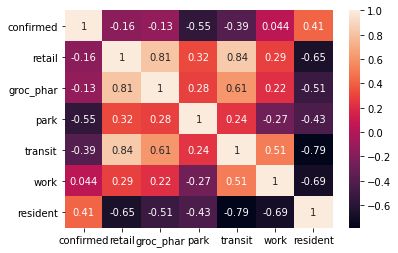

In [ ]:
# correlation matrix of Finland data
import seaborn as sn
import matplotlib.pyplot as plt
sn.heatmap(mobil_cfm1[(mobil_cfm1.region == "Finland")].corr(), annot=True)
plt.show()

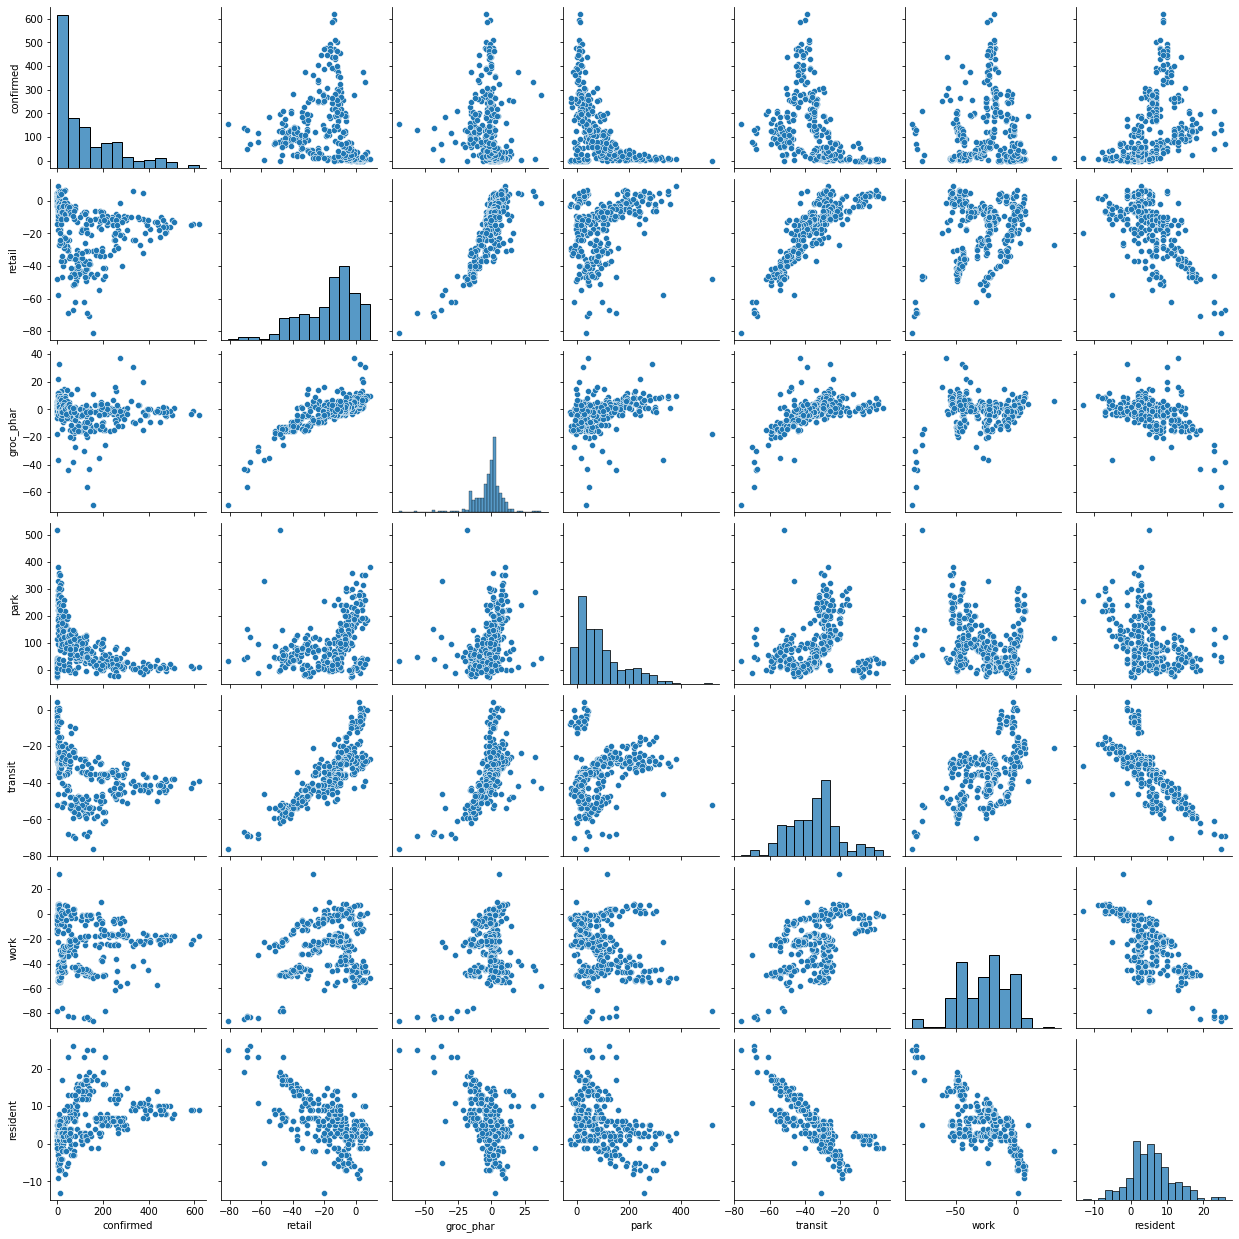

In [ ]:
sns.pairplot(FI)

In [ ]:
# basic statistics
mobil_cfm1[(mobil_cfm1.region == "Finland")].describe()

,confirmed,retail,groc_phar,park,transit,work,resident
count,343.000000,343.000000,343.000000,343.000000,343.000000,343.000000,343.000000
mean,124.402332,-16.900875,-2.186589,90.816327,-35.265306,-25.950437,5.644315
std,136.774716,17.100890,10.623000,89.083367,14.243584,20.179180,6.130312
min,0.000000,-81.000000,-69.000000,-24.000000,-76.000000,-86.000000,-13.000000
25%,15.000000,-28.500000,-5.000000,22.000000,-45.000000,-43.500000,2.000000
50%,74.000000,-12.000000,-1.000000,68.000000,-35.000000,-23.000000,5.000000
75%,195.500000,-5.000000,3.000000,129.500000,-27.000000,-10.000000,9.000000
max,619.000000,9.000000,37.000000,517.000000,4.000000,32.000000,26.000000


# Modelling

In [ ]:
# Finland data
FI = mobil_cfm1[(mobil_cfm1.region == "Finland")]
FI.head(n=20)

In [ ]:
# Calculate Growth Rate of Confirmed cases

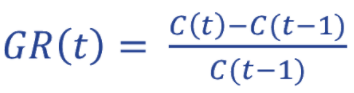



In [ ]:
FI['GR'] = FI['confirmed'].pct_change(1)

In [ ]:
#Replace where Growth Rate is NaN with 0
FI['GR'].fillna(0, inplace = True)

In [ ]:
FI.head(n=20)

In [ ]:
FI.isnull().sum().astype(int)

In [ ]:
FI.iloc[FI.values==np.inf]

,index,confirmed,date,hospital,region,retail,groc_phar,park,transit,work,resident,GR
7,693,1,2020-02-22,Finland,Finland,-2.0,-3.0,-23.0,-7.0,-4.0,0.0,inf
10,696,1,2020-02-25,Finland,Finland,4.0,3.0,45.0,-1.0,-12.0,2.0,inf
12,698,1,2020-02-27,Finland,Finland,3.0,1.0,37.0,-3.0,-12.0,2.0,inf
17,703,4,2020-03-03,Finland,Finland,2.0,3.0,14.0,-7.0,-7.0,2.0,inf
126,812,2,2020-06-20,Finland,Finland,-58.0,-37.0,330.0,-46.0,-23.0,-5.0,inf
148,834,4,2020-07-12,Finland,Finland,-3.0,6.0,194.0,-20.0,5.0,-5.0,inf


In [ ]:
# OLS mobility - confirmed cases for each region

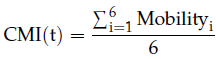

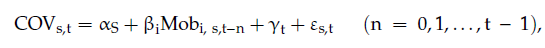

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [ ]:
print(regressor.intercept_)

In [ ]:
print(regressor.coef_)

In [ ]:
x = FI[['retail',	'groc_phar',	'park',	'transit',	'work',	'resident']]
y = FI['GR']

In [ ]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(x,y)

In [ ]:
FI = FI.reset_index()

In [ ]:
#regression model for Finland: confirmed cases vs mobility

In [ ]:
model = sm.formula.ols(formula = 'confirmed ~ retail	+ groc_phar	+ transit	+ work	+ resident', data= FI).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              confirmed   R-squared:                       0.666
Model:                            OLS   Adj. R-squared:                  0.661
Method:                 Least Squares   F-statistic:                     134.1
Date:                Thu, 11 Mar 2021   Prob (F-statistic):           6.29e-78
Time:                        14:29:52   Log-Likelihood:                -1985.3
No. Observations:                 343   AIC:                             3983.
Df Residuals:                     337   BIC:                             4006.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -28.8787     16.339     -1.767      0.078     -61.018       3.260
retail        10.3693      0.694     14.938      0.000       9.004      11.735
groc_phar     -3.3858      0.727     -4.655      0.000      -4.817      -1.955
transit      -10.4008      0.732    -14.216      0.000     -11.840      -8.962
work           6.0851      0.315     19.301      0.000       5.465       6.705
resident      19.8873      1.370     14.519      0.000      17.193      22.582
==============================================================================
Omnibus:                       77.750   Durbin-Watson:                   0.800
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              148.495
Skew:                           1.215   Prob(JB):                     5.68e-33
Kurtosis:                       5.117   Cond. No.                         203.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
# initiate df for modelling, lag n = 7
X1 = FI[['retail', 'groc_phar', 'transit', 'work', 'resident']].shift(10)
X1 = sm.add_constant(X1)
y1 = FI['confirmed']
mlag7 = sm.OLS(y1, X1, missing= 'drop')
mlag7 = mlag7.fit()
mlag7.summary()

# Model 1: OLS

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving fi_countryAgg_82features.csv to fi_countryAgg_82features.csv


In [ ]:
import io
df2 = pd.read_csv(io.BytesIO(uploaded['fi_countryAgg_82features.csv']))
df2

,Unnamed: 0,date,new_confirmed,new_deceased,total_confirmed,total_deceased,total_tested,population,population_male,population_female,rural_population,urban_population,largest_city_population,clustered_population,population_density,human_development_index,population_age_00_09,population_age_10_19,population_age_20_29,population_age_30_39,population_age_40_49,population_age_50_59,population_age_60_69,population_age_70_79,population_age_80_89,population_age_90_99,population_age_80_and_older,gdp,gdp_per_capita,human_capital_index,open_street_maps,latitude,longitude,area,rural_area,urban_area,life_expectancy,smoking_prevalence,diabetes_prevalence,infant_mortality_rate,...,hospital_beds,nurses,physicians,health_expenditure,out_of_pocket_health_expenditure,mobility_retail_and_recreation,mobility_grocery_and_pharmacy,mobility_parks,mobility_transit_stations,mobility_workplaces,mobility_residential,school_closing,workplace_closing,cancel_public_events,restrictions_on_gatherings,public_transport_closing,stay_at_home_requirements,restrictions_on_internal_movement,international_travel_controls,income_support,debt_relief,fiscal_measures,international_support,public_information_campaigns,testing_policy,contact_tracing,emergency_investment_in_healthcare,investment_in_vaccines,facial_coverings,vaccination_policy,stringency_index,noaa_station,noaa_distance,average_temperature,minimum_temperature,maximum_temperature,rainfall,dew_point,relative_humidity,infection_rate
0,0,2020-01-01,0.0,0.0,0.0,0.0,4.637143e+02,5517919.0,2723290.0,2794629.0,803426.0,4716888.0,1292232.0,1292232.0,18.1,0.883,576696.0,601705.0,675248.0,706147.0,657943.0,732782.0,724769.0,539919.0,253574.0,63393.0,302710.0,2.766545e+11,50150.0,0.814,54224.0,65.0,27.0,338450.0,289666.0,20052.0,81.8,20.4,5.6,1.4,...,4.4,14.7374,3.8118,4205.742676,850.713318,-2.0,2.0,15.0,-9.0,-8.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,2.866100e+09,46.408369,-3.450000,-9.994444,3.211111,1.143000,-4.222222,94.427827,0.000000
1,1,2020-01-02,0.0,0.0,0.0,0.0,4.637143e+02,5517919.0,2723290.0,2794629.0,803426.0,4716888.0,1292232.0,1292232.0,18.1,0.883,576696.0,601705.0,675248.0,706147.0,657943.0,732782.0,724769.0,539919.0,253574.0,63393.0,302710.0,2.766545e+11,50150.0,0.814,54224.0,65.0,27.0,338450.0,289666.0,20052.0,81.8,20.4,5.6,1.4,...,4.4,14.7374,3.8118,4205.742676,850.713318,-2.0,2.0,15.0,-9.0,-8.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,2.866100e+09,46.408369,3.211111,0.338889,4.388889,0.762000,0.922222,85.090429,0.000000
2,2,2020-01-03,0.0,0.0,0.0,0.0,4.637143e+02,5517919.0,2723290.0,2794629.0,803426.0,4716888.0,1292232.0,1292232.0,18.1,0.883,576696.0,601705.0,675248.0,706147.0,657943.0,732782.0,724769.0,539919.0,253574.0,63393.0,302710.0,2.766545e+11,50150.0,0.814,54224.0,65.0,27.0,338450.0,289666.0,20052.0,81.8,20.4,5.6,1.4,...,4.4,14.7374,3.8118,4205.742676,850.713318,-2.0,2.0,15.0,-9.0,-8.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,2.866100e+09,46.408369,1.988889,-1.783333,4.338889,1.342571,-0.705556,82.629384,0.000000
3,3,2020-01-04,0.0,0.0,0.0,0.0,4.637143e+02,5517919.0,2723290.0,2794629.0,803426.0,4716888.0,1292232.0,1292232.0,18.1,0.883,576696.0,601705.0,675248.0,706147.0,657943.0,732782.0,724769.0,539919.0,253574.0,63393.0,302710.0,2.766545e+11,50150.0,0.814,54224.0,65.0,27.0,338450.0,289666.0,20052.0,81.8,20.4,5.6,1.4,...,4.4,14.7374,3.8118,4205.742676,850.713318,-2.0,2.0,15.0,-9.0,-8.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,2.866100e+09,46.408369,-3.377778,-6.416667,0.422222,1.270000,-5.316667,86.510224,0.000000
4,4,2020-01-05,0.0,0.0,0.0,0.0,4.637143e+02,5517919.0,2723290.0,2794629.0,803426.0,4716888.0,1292232.0,1292232.0,18.1,0.883,576696.0,601705.0,675248.0,706147.0,657943.0,732782.0,724769.0,539919.0,253574.0,63393.0,302710.0,2.766545e+11,50150.0,0.814,54224.0,65.0,27.0,338450.0,289666.0,20052.0,81.8,20.4,5.6

In [ ]:
df2 = df2[['date','new_confirmed', 'infection_rate', 'mobility_retail_and_recreation',
          'mobility_grocery_and_pharmacy',	'mobility_parks',
          'mobility_transit_stations', 'mobility_workplaces',	'mobility_residential' ]]


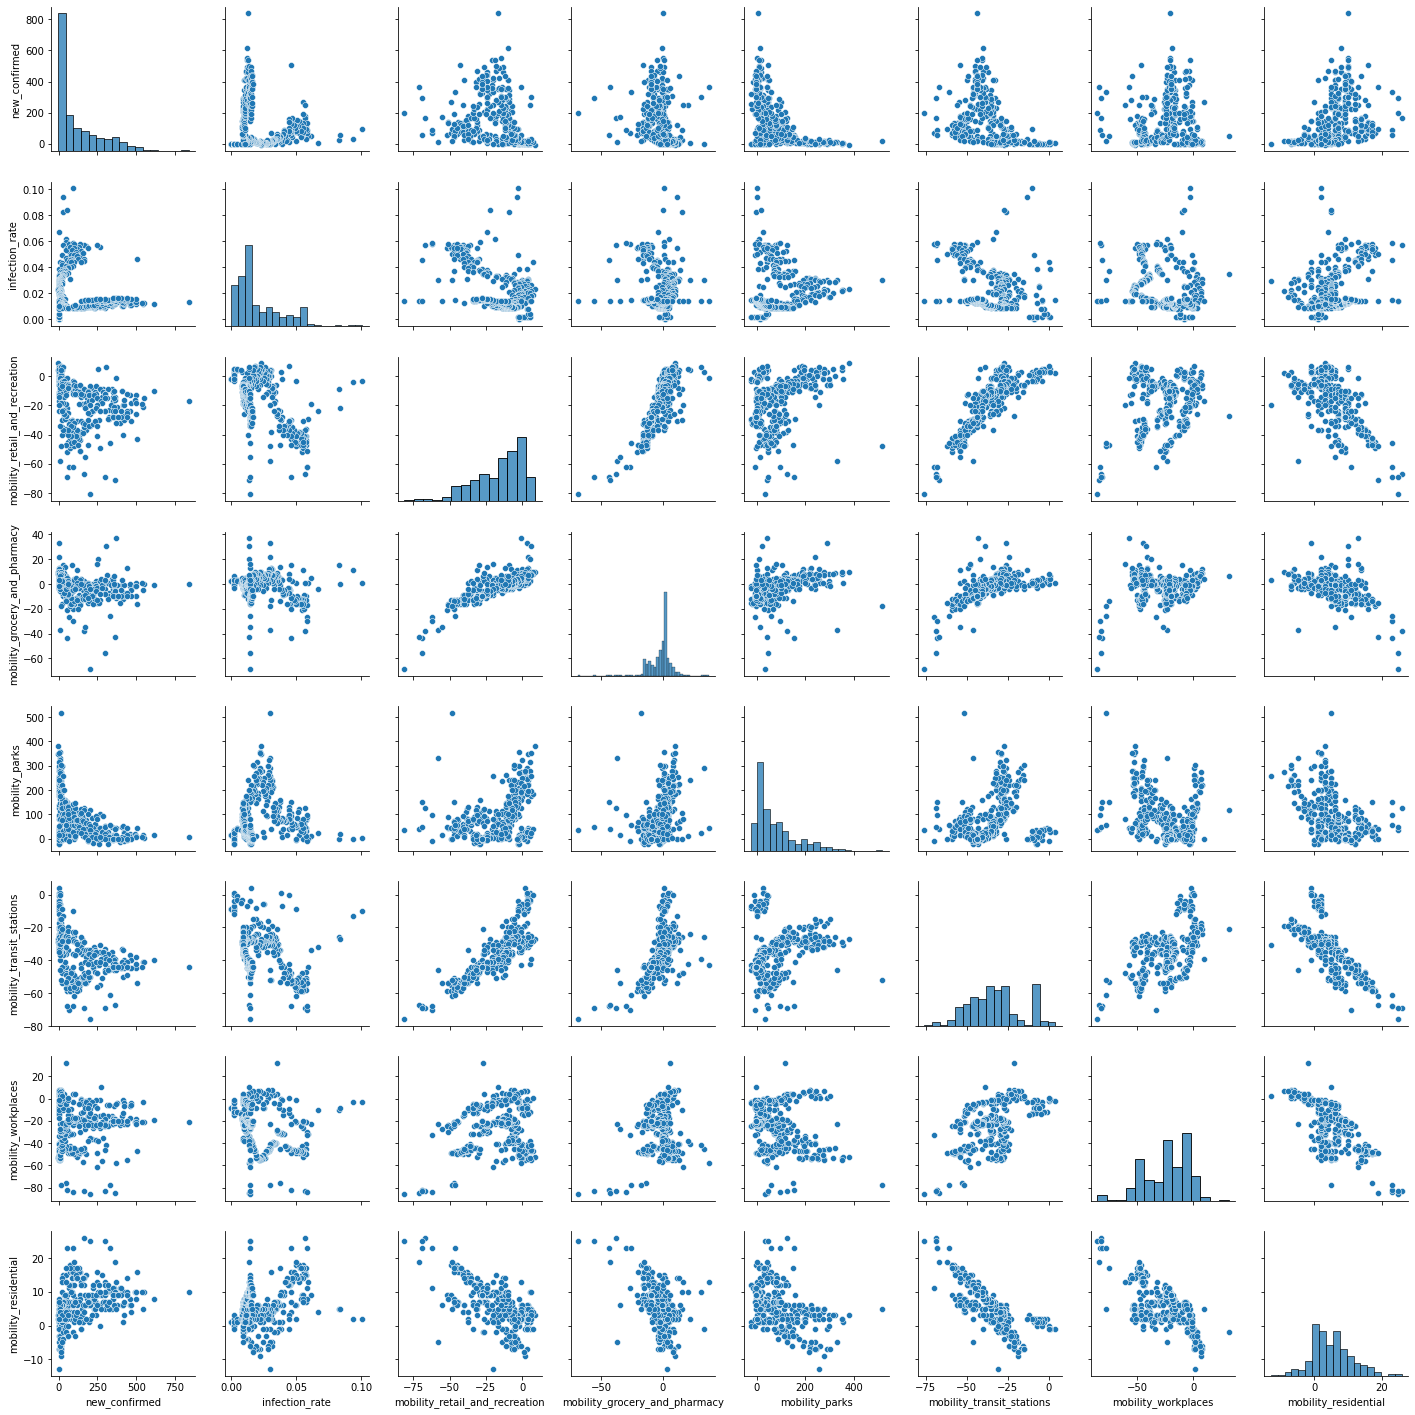

In [ ]:
sns.pairplot(df2)

In [ ]:
df2['GR'] = df2['new_confirmed'].pct_change(1)

In [ ]:
#df2['GR'].fillna(0, inplace = True)
#df2

In [ ]:
#Check null values
df2.isnull().sum().astype(int)

date                               0
new_confirmed                      0
mobility_retail_and_recreation     0
mobility_grocery_and_pharmacy      0
mobility_parks                     0
mobility_transit_stations          0
mobility_workplaces                0
mobility_residential               0
GR                                53
dtype: int64

In [ ]:
#Check infinite values
np.any(np.isinf(df2['GR']))

In [ ]:
# call rows with infinite values
df2.iloc[df2['GR'].values==np.inf]

In [ ]:
# replace inf values with NaN and extract only non-null values. Size reduced 408 obs to 341 obs
df2 = df2.replace([np.inf, -np.inf], np.nan).dropna(subset=["GR"], how="all")
df2

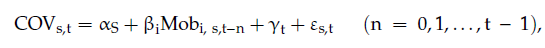

In [ ]:
model = sm.formula.ols(formula = 'new_confirmed ~ mobility_retail_and_recreation + mobility_grocery_and_pharmacy + mobility_parks + mobility_transit_stations + mobility_workplaces + mobility_residential', data= df2).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          new_confirmed   R-squared:                       0.612
Model:                            OLS   Adj. R-squared:                  0.606
Method:                 Least Squares   F-statistic:                     105.5
Date:                Thu, 11 Mar 2021   Prob (F-statistic):           2.42e-79
Time:                        00:48:19   Log-Likelihood:                -2420.2
No. Observations:                 408   AIC:                             4854.
Df Residuals:                     401   BIC:                             4882.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==================================================================================================
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
Intercept                        -34.1938     13.589     -2.516      0.012     -60.908      -7.480
mobility_retail_and_recreation     8.8415      0.781     11.325      0.000       7.307      10.376
mobility_grocery_and_pharmacy     -3.1926      0.839     -3.807      0.000      -4.841      -1.544
mobility_parks                  2.462e-05      0.128      0.000      1.000      -0.251       0.251
mobility_transit_stations        -10.4178      0.749    -13.900      0.000     -11.891      -8.944
mobility_workplaces                6.2881      0.723      8.695      0.000       4.866       7.710
mobility_residential              18.1340      3.168      5.724      0.000      11.906      24.362
==============================================================================
Omnibus:                      102.549   Durbin-Watson:                   1.074
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              307.341
Skew:                           1.157   Prob(JB):                     1.83e-67
Kurtosis:                       6.568   Cond. No.                         362.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
#model = sm.formula.ols(formula = 'GR ~ mobility_retail_and_recreation + mobility_grocery_and_pharmacy + mobility_parks + mobility_transit_stations + mobility_workplaces + mobility_residential', data= df2).fit()
#model.summary()

In [ ]:
# initiate df for modelling, lag n = 7
X1 = df2[['mobility_retail_and_recreation',
          'mobility_grocery_and_pharmacy',	'mobility_parks',
          'mobility_transit_stations', 'mobility_workplaces',	'mobility_residential']].shift(7)
X1 = sm.add_constant(X1)
y1 = df2['new_confirmed']
mlag7 = sm.OLS(y1, X1, missing= 'drop')
mlag7 = mlag7.fit()
mlag7.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          new_confirmed   R-squared:                       0.605
Model:                            OLS   Adj. R-squared:                  0.599
Method:                 Least Squares   F-statistic:                     100.5
Date:                Thu, 11 Mar 2021   Prob (F-statistic):           2.75e-76
Time:                        00:48:45   Log-Likelihood:                -2383.5
No. Observations:                 401   AIC:                             4781.
Df Residuals:                     394   BIC:                             4809.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==================================================================================================
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const                            -18.7027     13.758     -1.359      0.175     -45.750       8.345
mobility_retail_and_recreation     9.5454      0.792     12.058      0.000       7.989      11.102
mobility_grocery_and_pharmacy     -4.2662      0.850     -5.018      0.000      -5.938      -2.595
mobility_parks                    -0.0082      0.130     -0.063      0.950      -0.263       0.246
mobility_transit_stations        -10.5034      0.760    -13.812      0.000     -11.998      -9.008
mobility_workplaces                6.4705      0.734      8.820      0.000       5.028       7.913
mobility_residential              18.1303      3.212      5.645      0.000      11.816      24.444
==============================================================================
Omnibus:                      102.402   Durbin-Watson:                   1.012
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              310.372
Skew:                           1.169   Prob(JB):                     4.01e-68
Kurtosis:                       6.621   Cond. No.                         362.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
# initiate df for modelling, lag n = 10
X2 = df2[['mobility_retail_and_recreation',
          'mobility_grocery_and_pharmacy',	'mobility_parks',
          'mobility_transit_stations', 'mobility_workplaces',	'mobility_residential']].shift(10)
X2 = sm.add_constant(X2)
y2 = df2['new_confirmed']
mlag14 = sm.OLS(y2, X2, missing= 'drop')
mlag14 = mlag14.fit()
mlag14.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          new_confirmed   R-squared:                       0.617
Model:                            OLS   Adj. R-squared:                  0.612
Method:                 Least Squares   F-statistic:                     105.2
Date:                Thu, 11 Mar 2021   Prob (F-statistic):           2.01e-78
Time:                        00:49:20   Log-Likelihood:                -2359.7
No. Observations:                 398   AIC:                             4733.
Df Residuals:                     391   BIC:                             4761.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==================================================================================================
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const                            -17.3309     13.555     -1.279      0.202     -43.980       9.318
mobility_retail_and_recreation    10.3120      0.781     13.211      0.000       8.777      11.847
mobility_grocery_and_pharmacy     -5.0289      0.838     -6.001      0.000      -6.676      -3.381
mobility_parks                    -0.1568      0.128     -1.229      0.220      -0.408       0.094
mobility_transit_stations        -11.8423      0.749    -15.802      0.000     -13.316     -10.369
mobility_workplaces                6.1764      0.723      8.538      0.000       4.754       7.599
mobility_residential              12.8016      3.167      4.042      0.000       6.575      19.028
==============================================================================
Omnibus:                      107.441   Durbin-Watson:                   1.062
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              355.859
Skew:                           1.202   Prob(JB):                     5.32e-78
Kurtosis:                       6.959   Cond. No.                         362.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
model = sm.formula.ols(formula = 'new_confirmed ~ mobility_retail_and_recreation + mobility_grocery_and_pharmacy + mobility_transit_stations + mobility_workplaces', data= df2).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          new_confirmed   R-squared:                       0.471
Model:                            OLS   Adj. R-squared:                  0.466
Method:                 Least Squares   F-statistic:                     89.78
Date:                Thu, 11 Mar 2021   Prob (F-statistic):           1.67e-54
Time:                        00:50:05   Log-Likelihood:                -2483.5
No. Observations:                 408   AIC:                             4977.
Df Residuals:                     403   BIC:                             4997.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==================================================================================================
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
Intercept                        -89.9321     14.860     -6.052      0.000    -119.145     -60.719
mobility_retail_and_recreation     7.4100      0.894      8.285      0.000       5.652       9.168
mobility_grocery_and_pharmacy     -3.8036      0.971     -3.916      0.000      -5.713      -1.894
mobility_transit_stations        -12.6235      0.776    -16.273      0.000     -14.148     -11.099
mobility_workplaces                3.9385      0.345     11.420      0.000       3.261       4.616
==============================================================================
Omnibus:                       81.358   Durbin-Watson:                   0.773
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              175.949
Skew:                           1.037   Prob(JB):                     6.21e-39
Kurtosis:                       5.459   Cond. No.                         140.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
df2['CMI'] = df2[['mobility_retail_and_recreation','mobility_grocery_and_pharmacy',	'mobility_transit_stations',	'mobility_workplaces']].mean(axis=1)

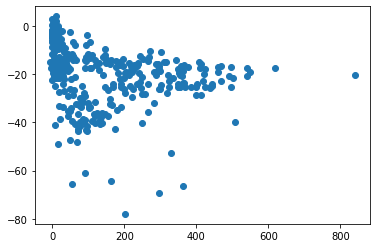

In [ ]:
plt.scatter(df2['new_confirmed'], df2['CMI'])
plt.show()

In [ ]:
df2['CMI1'] = df2[['mobility_retail_and_recreation','mobility_grocery_and_pharmacy',	'mobility_transit_stations',	'mobility_workplaces','mobility_parks','mobility_residential']].mean(axis=1)

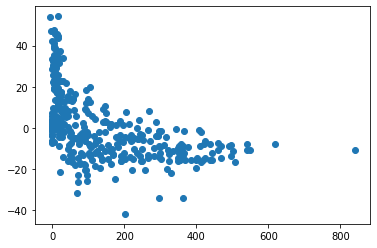

In [ ]:
plt.scatter(df2['new_confirmed'], df2['CMI1'])
plt.show()

In [ ]:
#Isotonic model
#Exponential model
#Break data - march - june/may

In [ ]:
#ARIMA model

#check for autocorrelation

In [ ]:
#GARCH model

In [ ]:
model = sm.formula.ols(formula = 'new_confirmed ~ mobility_parks + mobility_transit_stations + mobility_workplaces + mobility_residential', data= df2).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          new_confirmed   R-squared:                       0.102
Model:                            OLS   Adj. R-squared:                  0.100
Method:                 Least Squares   F-statistic:                     46.26
Date:                Thu, 11 Mar 2021   Prob (F-statistic):           3.73e-11
Time:                        14:15:07   Log-Likelihood:                -2591.5
No. Observations:                 408   AIC:                             5187.
Df Residuals:                     406   BIC:                             5195.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     52.5786     12.302      4.274      0.000      28.394      76.763
CMI           -3.7370      0.549     -6.801      0.000      -4.817      -2.657
==============================================================================
Omnibus:                      107.303   Durbin-Watson:                   0.370
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              208.670
Skew:                           1.442   Prob(JB):                     4.87e-46
Kurtosis:                       4.991   Cond. No.                         40.1
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
#Acceleration rate n = 5
df2['Acceleration'] = df2['total_confirmed'].pct_change(5)
df2.head(n=20)

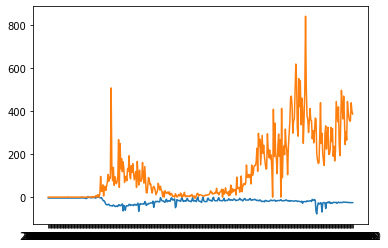

In [ ]:
plt.plot(df2['date'], df2[[ 'CMI']])
plt.plot(df2['date'], df2[[ 'new_confirmed']])
plt.show()

In [ ]:
url = "https://sampo.thl.fi/pivot/prod/en/epirapo/covid19case/fact_epirapo_covid19case.json?column=measure/n_labtest-445356"
test = jsonNorm(url)

In [ ]:
test

### Regional test numbers

Load regional total test cases from THL


ISSUE: only weekly data available on regional level, country level daily

In [ ]:
!pip -q install pyjstat

In [ ]:
#extra imports for temporary use
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from pyjstat import pyjstat

In [ ]:
thl_testing_weekly = pd.read_csv(
    'https://sampo.thl.fi/pivot/prod/fi/epirapo/covid19case/fact_epirapo_covid19case.csv?row=hcdmunicipality2020-445222&column=dateweek20200101-509030&filter=measure-445356&filter=hcdmunicipality2020-445222&',
     sep=';'
     )

#thl_testing_weekly[['rand1', 'year', 'rand2', 'week']] = thl_testing_weekly['Aika'].str.split(' ', expand=True)
#thl_testing_weekly['Aika'] = thl_testing_weekly['year'] + str('-') + thl_testing_weekly['week']
#thl_testing_weekly.drop(['rand1', 'year', 'rand2', 'week'], axis=1, inplace=True)
thl_testing_weekly.sample(5)
#thl_testing_weekly = jsonNorm('https://sampo.thl.fi/pivot/prod/fi/epirapo/covid19case/fact_epirapo_covid19case.json?row=hcdmunicipality2020-445222&column=dateweek20200101-509030&filter=measure-445356&filter=hcdmunicipality2020-445222&')
#pd.json_normalize(thl_testing_weekly['dataset']['dimension'], max_level = 2)

In [ ]:
testing_url = 'https://sampo.thl.fi/pivot/prod/fi/epirapo/covid19case/fact_epirapo_covid19case.json?row=hcdmunicipality2020-445222&column=dateweek20200101-509030&filter=measure-445356&filter=hcdmunicipality2020-445222&'
testing_json = pyjstat.Dataset.read(testing_url)
testing_df = testing_json.write('tesing_dataframe')
testing_df